**2. R2 and R ( Partial correlation)**

**In fact, simple correlation mainly focuses on finding the influence of each variable on the other.**

**Whereas partial_correlation is used to find the refined relationship between two variables with the effect of the other influencing variables being excluded/controlled.**

**Weight Detection: The variables can be quantity of food, weight increase, calories. This technique can be used to find the relationship between the quantity of food, weight increase, and the variable being controlled is calories.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Corr_data.csv")
df.head(10)

,A,B,Z
0,4,1,1
1,2,2,2
2,2,2,3
3,1,4,4
4,8,9,1
5,6,8,2
6,9,9,3
7,8,6,4
8,11,14,1
9,13,12,2


In [3]:
df.shape

(12, 3)

Text(0, 0.5, 'B')

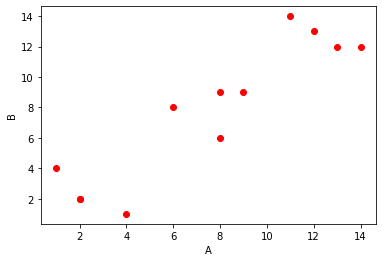

In [4]:
# Scatterplot to understand the relationship
plt.plot(df["A"],df["B"],'ro')
plt.xlabel("A")
plt.ylabel("B")

In [5]:
# Calculate pearson correlation aka correlation
df.corr()

,A,B,Z
A,1.000000,0.909556,0.017213
B,0.909556,1.000000,-0.033710
Z,0.017213,-0.033710,1.000000


In [6]:
df2 = df.corr()

In [7]:
df2.columns

Index(['A', 'B', 'Z'], dtype='object')

In [8]:
r_AB = df2.loc['A', 'B']

In [9]:
r_AB # Correlation for A ~ B (r)

0.9095557523685209

In [10]:
r_AZ = df2.loc['A', 'Z']

In [11]:
r_AZ  # Correlation for A ~ Z (r)

0.01721325931647704

In [12]:
r_BZ = df2.loc['B', 'Z']

In [13]:
r_BZ  # Correlation for B ~ Z (r)

-0.033709993123162446

In [14]:
R2_AB = r_AB*r_AB

In [15]:
R2_AB # R^2 for A ~ B 

0.8272916666666662

In [16]:
R2_AZ = r_AZ*r_AZ

In [17]:
R2_AZ # R^2 for A ~ Z 

0.00029629629629628366

In [18]:
R2_BZ = r_BZ*r_BZ

In [19]:
R2_BZ # R^2 for B ~ Z 

0.0011363636363636595

<AxesSubplot:>

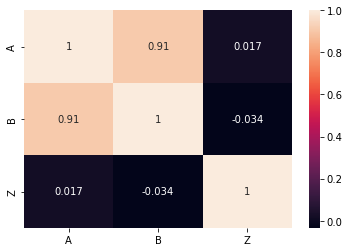

In [20]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)  # Heatmap visualization using Seaborn for Correlation

In [21]:
# Now we have to find the Partial Correlation

In [22]:
#!pip install pingouin
import pingouin as pg
pg.partial_corr(data=df, x='A', y='B', covar='Z')

# Where,
# Data = Name of the dataframe.
# x  = Name of column in dataframe.
# y = Name of column in dataframe.
# Here Z is the influencing variable to calculate the Partial Correlation

,n,r,CI95%,p-val
pearson,12,0.910789,"[0.69, 0.98]",0.000097


In [23]:
df_Cor = df.pcorr().round(7) 

In [24]:
# We got the Partial Cor for A and B as 0.910 and Cor as 0.909

In [25]:
df3 = df_Cor
df3.head()

,A,B,Z
A,1.000000,0.910789,0.115264
B,0.910789,1.000000,-0.118806
Z,0.115264,-0.118806,1.000000


In [26]:
Pr2_ZAB = df3.loc['Z', 'A']

In [27]:
Pr2_ZAB # Partial Correlation for A

0.1152639

In [28]:
Pr2_ZBA = df3.loc['Z', 'B']

In [29]:
Pr2_ZBA # Partial Correlation for B

-0.1188062

<AxesSubplot:>

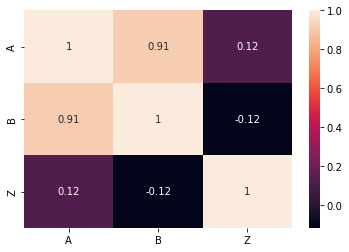

In [30]:
import seaborn as sns
sns.heatmap(df.pcorr(),annot=True)  # Heatmap visualization using Seaborn for Partial Correlation